You will need a few unusual libraries

In [2]:
!pip install python_speech_features
!pip install PyGithub
!pip install pydub

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5877 sha256=df9ee48c33901d32019b688d89776702642df971d541684a1eeb988343cc523c
  Stored in directory: c:\users\yucachen\appdata\local\pip\cache\wheels\60\90\3c\4b5996a95d363fa14525597a19146a940bec467b44b2a14580
Successfully built python_speech_features


In [4]:
#system options you will need
import sys
import os
import numpy as np
import glob as glob

import scipy.io.wavfile as wav
from python_speech_features import mfcc
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

from scipy.spatial.distance import cdist, euclidean
from scipy.spatial import distance_matrix

import pylab as pl
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [6]:
np.set_printoptions(threshold=sys.maxsize)
import pylab as pl
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [10]:
import sys
import os

# from google.colab import drive

# drive.mount("/content/gdrive",force_remount=True)

In [14]:
"""
note from Yuca 4/13/2025: I changed it to the MLTSA directory I have,
I also made a new "data" folder
and I had to chang the commands as well
make sure to change it for you guys indiviudally as well to whatever works!
"""
# note from Yuca: I had to change these commands to the ones below
# I skip the "cd data" below as a result
#cd /content/gdrive/MyDrive/MLTSA25/
#cd /content/gdrive/MLTSA25

# os.listdir()
# os.chdir("/content/gdrive/MyDrive/MLTSA25/data/")
os.listdir()
os.chdir("./data/")
os.listdir()


['Jarvisd_template.wav',
 'Jarvisd_template.wav.1',
 'Jarvisd_template.wav.2',
 'Jarvise_template.wav',
 'Jarvise_template.wav.1',
 'Jarvise_template.wav.2',
 'Jarvish_template.wav',
 'Jarvish_template.wav.1',
 'Jarvish_template.wav.2',
 'Jarvisu_template.wav',
 'Jarvisu_template.wav.1',
 'Jarvisu_template.wav.2',
 'Jarvis_template.wav',
 'Jarvis_template.wav.1',
 'Jarvis_template.wav.2',
 'Tofftld_template.wav',
 'Tofftld_template.wav.1',
 'Tofftld_template.wav.2',
 'Tofftle_template.wav',
 'Tofftle_template.wav.1',
 'Tofftle_template.wav.2',
 'Tofftlh_template.wav',
 'Tofftlh_template.wav.1',
 'Tofftlh_template.wav.2',
 'Tofftlu_template.wav',
 'Tofftlu_template.wav.1',
 'Tofftlu_template.wav.2',
 'Tofftl_template.wav',
 'Tofftl_template.wav.1',
 'Tofftl_template.wav.2',
 'Tontld_template.wav',
 'Tontld_template.wav.1',
 'Tontld_template.wav.2',
 'Tontle_template.wav',
 'Tontle_template.wav.1',
 'Tontle_template.wav.2',
 'Tontlh_template.wav',
 'Tontlh_template.wav.1',
 'Tontlh_templ

In [16]:
# cd /content/gdrive/My\ Drive/MLTSA25/HW5/data/

In [18]:
# cd data

# I am going to download data from someone's github repo
One of you asked me earlier in the semester how one would so this. We will use data from Salika Dave, a student at Mumbai tech who stored some soundbites on her GitHub repo.

In [ ]:
from github import Github
# First create a Github instance:
# we do not need to use username and password because we will access a public repo
g = Github()



In [ ]:
guser = g.get_user("salik-a")
repo = guser.get_repo("Speech_Recognition")


In [ ]:
wavfiles = repo.get_contents("voices")
#.repos_url#("Speech_Recognition")
wavfiles

[ContentFile(path="voices/Jarvis_template.wav"),
 ContentFile(path="voices/Jarvisd_template.wav"),
 ContentFile(path="voices/Jarvise_template.wav"),
 ContentFile(path="voices/Jarvish_template.wav"),
 ContentFile(path="voices/Jarvisu_template.wav"),
 ContentFile(path="voices/Tofftl_template.wav"),
 ContentFile(path="voices/Tofftld_template.wav"),
 ContentFile(path="voices/Tofftle_template.wav"),
 ContentFile(path="voices/Tofftlh_template.wav"),
 ContentFile(path="voices/Tofftlu_template.wav"),
 ContentFile(path="voices/Tontl_template.wav"),
 ContentFile(path="voices/Tontld_template.wav"),
 ContentFile(path="voices/Tontle_template.wav"),
 ContentFile(path="voices/Tontlh_template.wav"),
 ContentFile(path="voices/Tontlu_template.wav"),
 ContentFile(path="voices/Tontt_template.wav"),
 ContentFile(path="voices/Tonttd_template.wav"),
 ContentFile(path="voices/Tontte_template.wav"),
 ContentFile(path="voices/Tontth_template.wav"),
 ContentFile(path="voices/Tonttu_template.wav"),
 ContentFile(p

In [ ]:
data_path = "https://raw.githubusercontent.com/salik-a/Speech_Recognition/master/"
for f in wavfiles:
    cmd = "wget " + "%s/%s"%(data_path,f.path)
    os.system(cmd)

In [ ]:
%ls

Jarvisd_template.wav  Tofftlu_template.wav  Tontt_template.wav
Jarvise_template.wav  Tontld_template.wav   Tonttu_template.wav
Jarvish_template.wav  Tontle_template.wav   Ttatd_template.wav
Jarvis_template.wav   Tontlh_template.wav   Ttate_template.wav
Jarvisu_template.wav  Tontl_template.wav    Ttath_template.wav
Tofftld_template.wav  Tontlu_template.wav   Ttat_template.wav
Tofftle_template.wav  Tonttd_template.wav   Ttatu_template.wav
Tofftlh_template.wav  Tontte_template.wav
Tofftl_template.wav   Tontth_template.wav


In [34]:
# Note from Yuca 4/13/2025: if already downloaded data, just skip to this cell
# sometimes the cell works, sometimes it doesn't

# os.chdir("/content/gdrive/MyDrive/MLTSA25/")
# cd ../
# os.chdir("./PHYS664/")
os.listdir()

['.ipynb_checkpoints', 'Copy_of_dtw_instructions.ipynb', 'data']

In [36]:
filenames = np.sort(glob.glob("data/*wav"))
norm_obj= Normalize(vmin=0, vmax=4)
colors = {"Jarvis": (pl.cm.viridis(norm_obj(0)),
                     "Jarvis"),
         "Tofftl": (pl.cm.viridis(norm_obj(1)),
                    "Turn off the lights"),
         "Tontl": (pl.cm.viridis(norm_obj(2)),
                   "Turn on the lights"),
         "Tontt": (pl.cm.viridis(norm_obj(3)),
                   "Turn on the TV"),
         "Ttat": (pl.cm.viridis(norm_obj(4)),
                  "Turn the air temperature")}
y = np.array([[k for k,v in colors.items() for i in range(5)]])[0]
y

array(['Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Tofftl',
       'Tofftl', 'Tofftl', 'Tofftl', 'Tofftl', 'Tontl', 'Tontl', 'Tontl',
       'Tontl', 'Tontl', 'Tontt', 'Tontt', 'Tontt', 'Tontt', 'Tontt',
       'Ttat', 'Ttat', 'Ttat', 'Ttat', 'Ttat'], dtype='<U6')

In [45]:
for k,v in colors.items():
        print(k,v)

Jarvis ((0.267004, 0.004874, 0.329415, 1.0), 'Jarvis')
Tofftl ((0.229739, 0.322361, 0.545706, 1.0), 'Turn off the lights')
Tontl ((0.127568, 0.566949, 0.550556, 1.0), 'Turn on the lights')
Tontt ((0.369214, 0.788888, 0.382914, 1.0), 'Turn on the TV')
Ttat ((0.993248, 0.906157, 0.143936, 1.0), 'Turn the air temperature')


#Data Exploration and Visualization
## plot the sound bites
the sound bites are read in as numpy array by the ```scipy.io.wavfile``` module. The dataset is comprised of 5 soundbites for each of 5 sentences. The word "Jarvis", the sentences "Turn off the lights", "Turn on the lights", "Turn on the TV", and "Turn the air temperature". Each sound bite, for each sentence, is read by a different person, with different accents, genders, and background noise. if you install the pydub  module and run the notebook locally you can hear each soundbite in this loop (wont play on google colab).

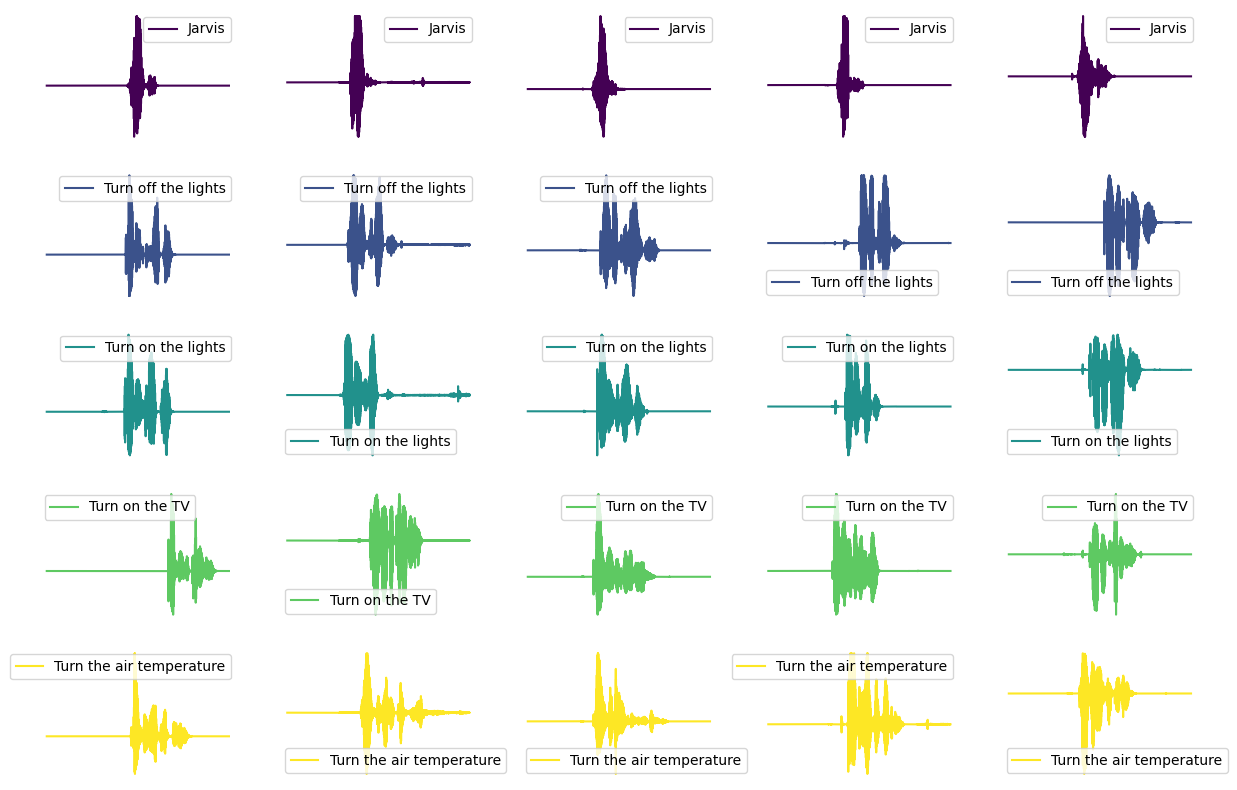

In [60]:
fig = pl.figure(figsize(15, 10))
wavfiles = []
from pydub import AudioSegment
from pydub.playback import play


for i,f in enumerate(filenames):
    ax = fig.add_subplot(5,5,i+1)
    phrase = AudioSegment.from_wav(f)
    # play(phrase)
    wavfiles.append(wav.read(f))
    for k,v in colors.items():
        if k in f:
            color = colors[k][0]
            label = colors[k][1]
    ax.plot(wavfiles[-1][1], label=label, color=color)
    # print(wavfiles)
    ax.axis('off')
    pl.legend()

pl.show()

Figure 1: 25 sound bites read in as arrays from the original *.wav* file. The arrays represnet sound intensity *vs* time, but the spectral sound information (frequency) is lost.  These are therefore simplified representations of the original data.
Each of 5 sentences is recorded as spoken by a different person in a different environment: the word "Jarvis", the sentences "Turn off the lights", "Turn on the lights", "Turn on the TV", and "Turn the air temperature".  In the above plot, each row is a different sentence (also plotted with a different color). The content of the soundbite is written on top of the wave plot.  At a glance, the soundbites show some similarities within the same sentence, mostly in the duration of the speech. We also note that the starting point of the speech is not homogeneous within the recorded segment.

The following analysis could be implemented in the full spectral-features dataset, but the current 1-dimensional representation of the data alows for a simpler implementation of the methods.

In [62]:
wavfiles = np.array([w[1] for w in wavfiles])
print ("the size of the full data set is :", wavfiles.shape)

the size of the full data set is : (25, 64000)


## downsampling the large arrays
each sound bit is stored in an array of 64000 elements. To work effectively we will downsample them by a factor of 10. Occasionally I will downsample it further.

Since classifying these sound mites will require generating distance arrays, we want to know ahead of time what we are getting ourelves into. We are working with foating point numbers
- 64 bits per number
We want to build 2D arrays that are NxN sized where N is the length of the soundbite array (64,000)
- 64000x64000
- 1 GB is 8e9 bit
## *task 1: Print out the amount of memory in Gigabytes (or Megabytes where needed) that would take to create a single distance matrix, a distance matrix subsampling the array by 10, by 8, and by 100*

In [66]:
print("calculating a distance matrix for the full files would requires " +
      f"{wavfiles[0].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 10 requires " +
      f"{wavfiles[0][::8].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 10 requires " +
      f"{wavfiles[0][::10].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 100 requires " +
      f"{wavfiles[0][::100].shape[0]**2*64/8e6} MB of memory")

calculating a distance matrix for the full files would requires 32.768 GB of memory
subsampling by a factor 10 requires 0.512 GB of memory
subsampling by a factor 10 requires 0.32768 GB of memory
subsampling by a factor 100 requires 3.2768 MB of memory


In [68]:
steps = 10

In [70]:
X = preprocessing.scale(wavfiles[:,::steps], axis=1)

In [72]:
X.shape, X.std(axis=1)

((25, 6400),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.]))

inspect the sound bites: the original array and the downsampled, normalized ones.

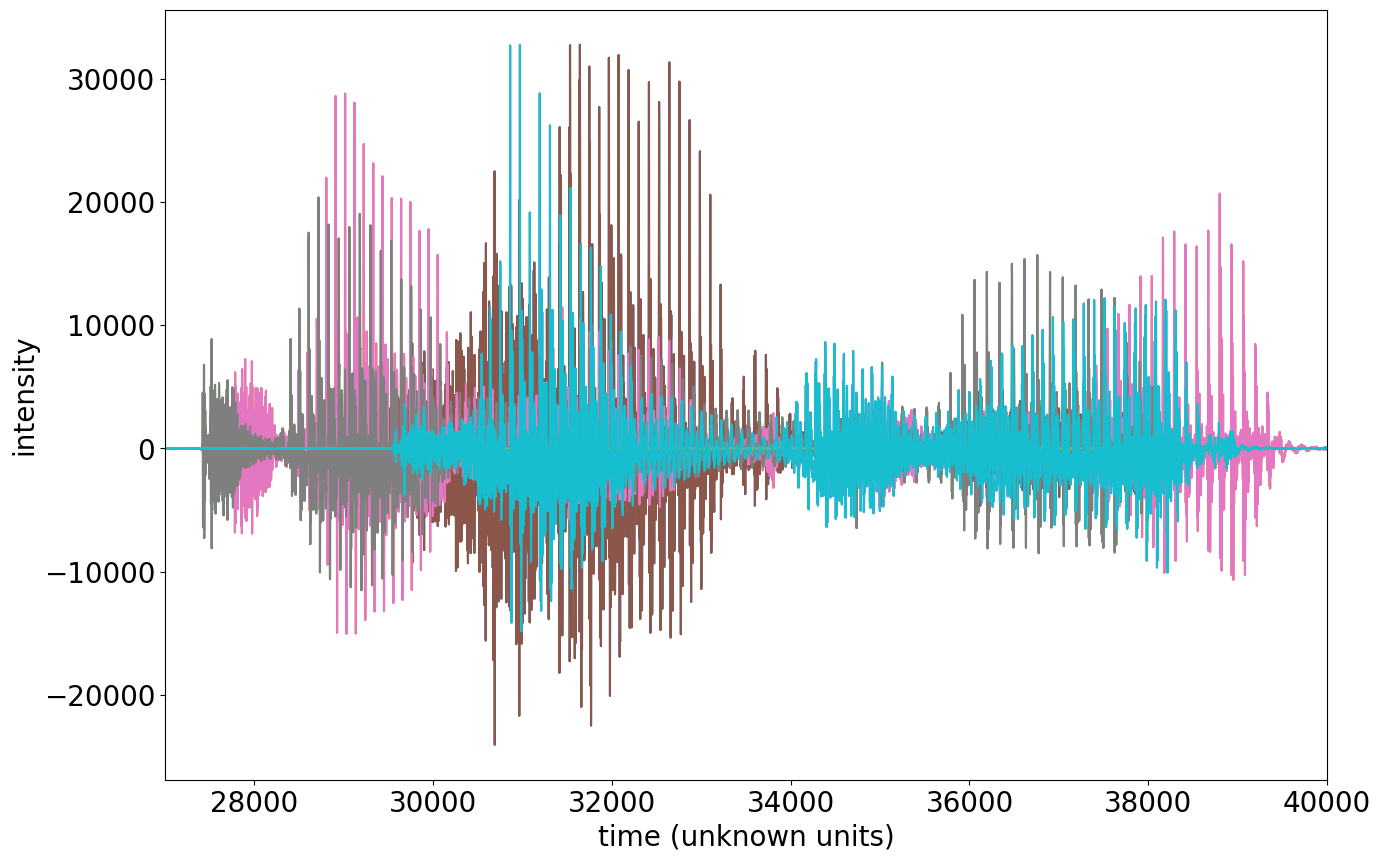

In [77]:
pl.rcParams['font.size'] = 20
pl.plot(wavfiles[0])
pl.plot(wavfiles[5])
pl.plot(wavfiles[10])
pl.plot(wavfiles[15])
pl.plot(wavfiles[20])
pl.xlim(27000, 40000)
pl.xlabel("time (unknown units)", fontsize=20)
pl.ylabel("intensity", fontsize=20);
pl.show()

Figure 2: the first sound bite for each sentene, the core portion of the array only is shown, elements 27000-40000 of 64000.


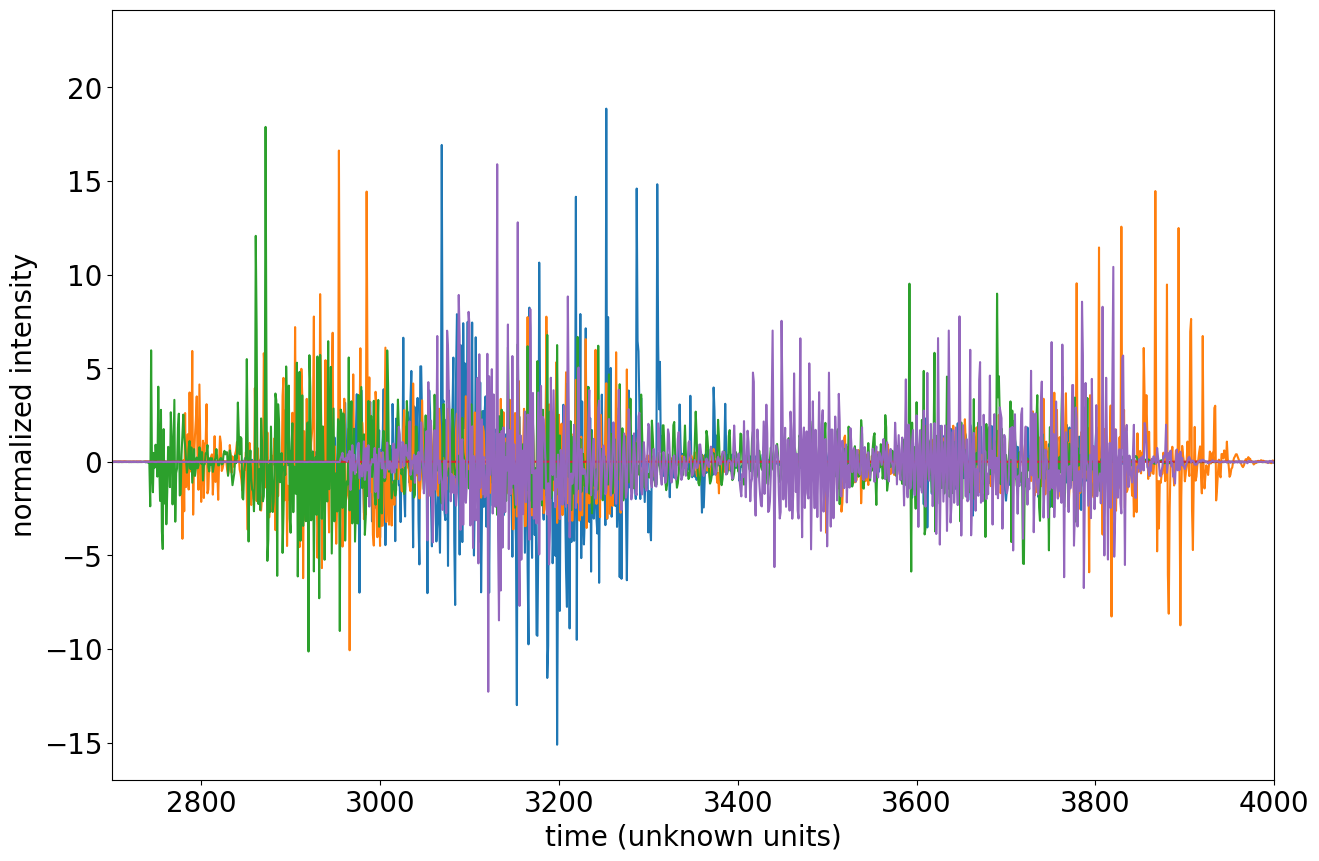

In [79]:
pl.rcParams['font.size'] = 20
pl.plot(X[0])
pl.plot(X[5])
pl.plot(X[10])
pl.plot(X[15])
pl.plot(X[20])
pl.xlim(2700, 4000)
pl.xlabel("time (unknown units)", fontsize=20)
pl.ylabel("normalized intensity", fontsize=20);
pl.show()

Figure 3: Same as figure 2 but for the standardized arrays, downsampled by a factor 10 by selecting every 10th datum.

# Calculating distance between sound bites
# Naive distsances between two arrays
Plot the distance between each pair of the 25 sound bites. The distance matrix should be 25x25 and each entry should be a naive distance calculated between the 2 arrays.

The naive distance can be the sum of the difference between entries of the array at the same time stamp, i.e. along the diagonal, or its absolute value, which would correspond to the L1 metric

In [83]:
def naive_distances(a, b):
    return (a - b).sum()
def l1(a, b):
    return (np.abs(a - b)).sum()

to save time I am resampling again by the same step. This is equivalent to resampling by 100

## *task 1: explain the figures*

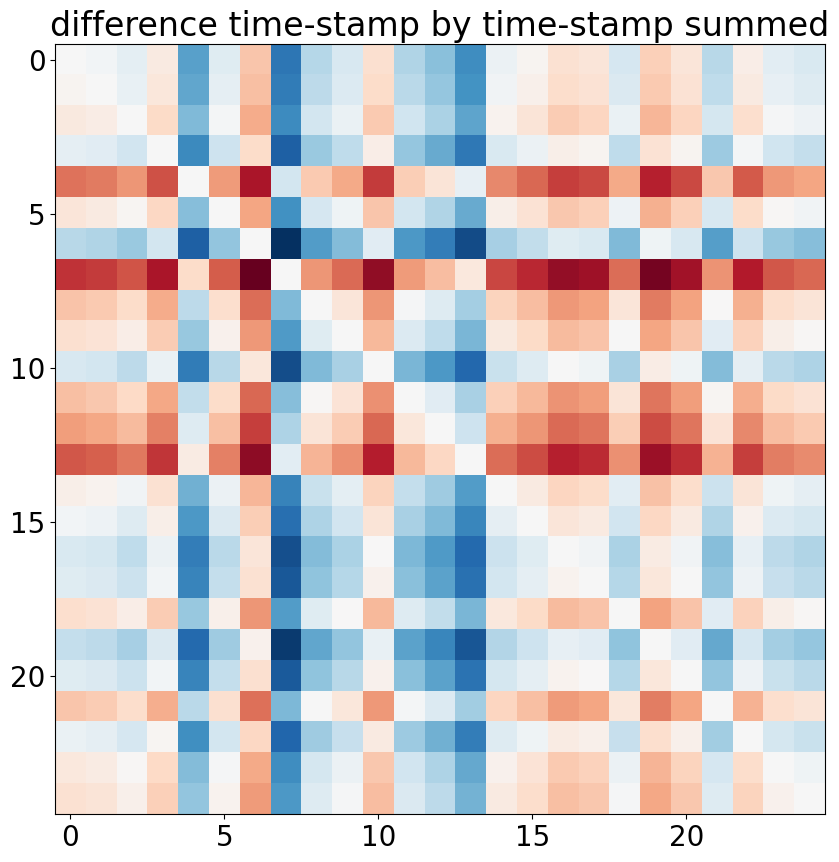

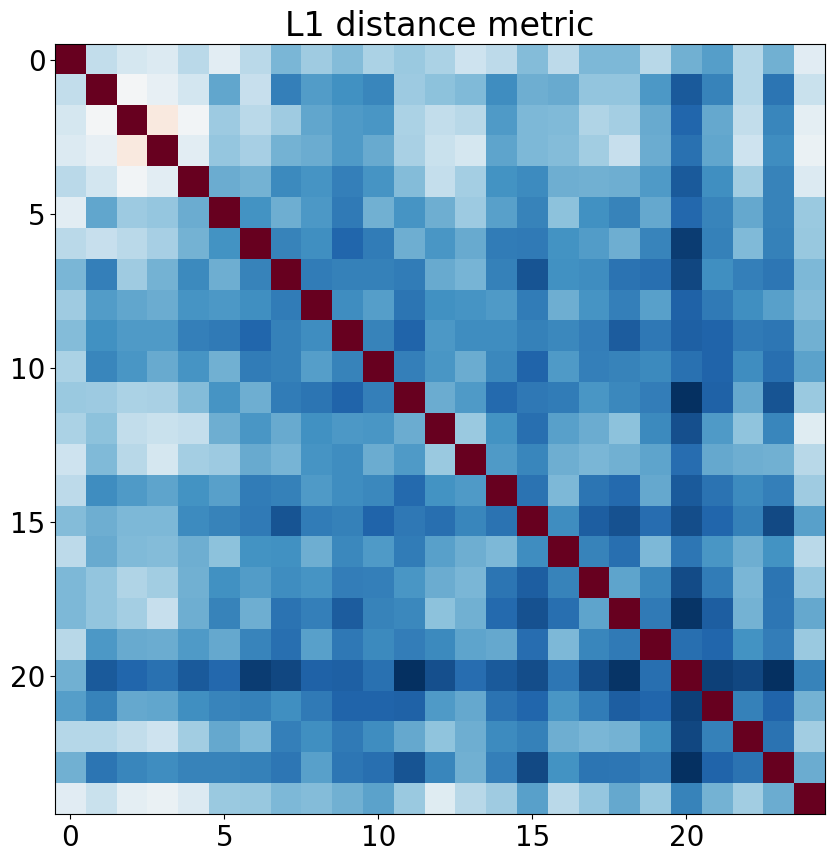

In [86]:
pl.imshow(cdist(X[:,::steps],
               X[:,::steps], metric=naive_distances),
         cmap="RdBu")
pl.title("difference time-stamp by time-stamp summed")
pl.figure()
pl.imshow(cdist(X[:,::steps],
               X[:,::steps], metric=l1),
         cmap="RdBu")
pl.title("L1 distance metric");
pl.show()

Figure 3: (Top graph) A colormap of the distances between each sound bite at the same time-stamp summed is shown for every possible pair of sound bites. A white color denotes a smaller relative distance/difference between the sound bites, while a more blue or red color denotes a larger relative distance/difference between the sound bites. All elements on the diagonal are white, as it is expected that the distance between an object and itself is zero. It is noted there is a general red band of color blocks in the graph ranging from y in [4, 13] and a general blue band of color blocks ranging from x in [4, 13]. These seen differences imply the degree of similarity between certain sound bites in different directions (due to not taking the absolute value of the difference) using this direct comparison of sound bites at the same time (i.e. "turn on the lights" is more similar to "turn off the lights" compared to "Jarvis"). (Bottom graph) A colormap of the distances between each sound bite using the L1 (Manhattan) distance metric is shown for every possible pair of sound bites. A red color denotes a smaller L1 value, while a more blue color denotes a larger L1 value. All elements on the diagional are red, as it is expected that the L1 distance between an object and itself will be smaller than any other possible combination. Differences from the L1 distance metric and distances between each sound bite at the same time-stamp summed are shown from seeing general differences in the color pattern between these two colormaps. A heavier blue color is seen when y is at 20 across most values of x, signaling that this particular sound bite is more different to the rest of the soundbites -- a feature not seen by calculating distances between each sound bite at the same time-stamp. 

# Pairwise time-stamps distance: each time series is a vector, so we can look at the timestamp-to-timestamp distance matrix

This is the object whose diagonal you summed over to get the naive distances and the L1 distances above.
For the full sample array this should be a 64000x64000 array. It is ok to calculate the distance and plot the stanradrized arrays, further downsampled by 10 (640x640 array)

use ```scipy.spatial.distance.cdist()``` and the L1 metric that was created earlier

## *task 2 comment on the following 2 figures*

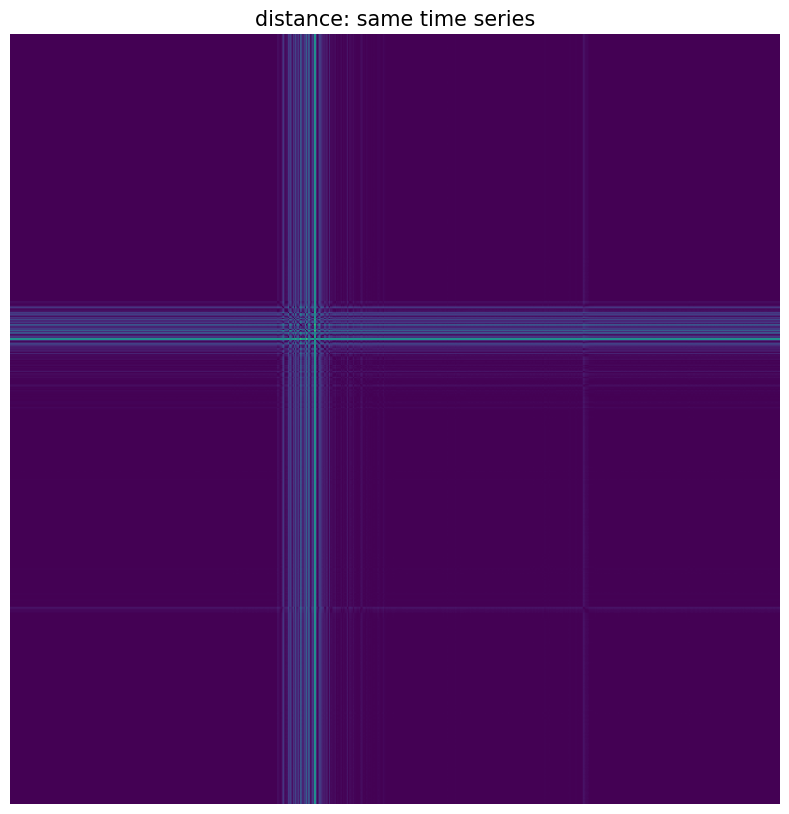

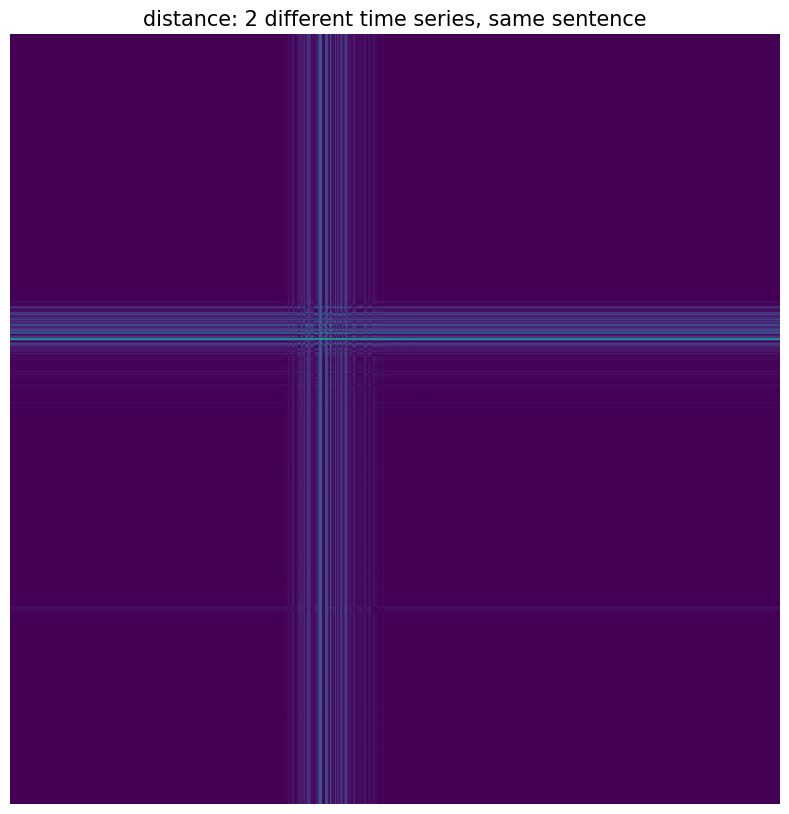

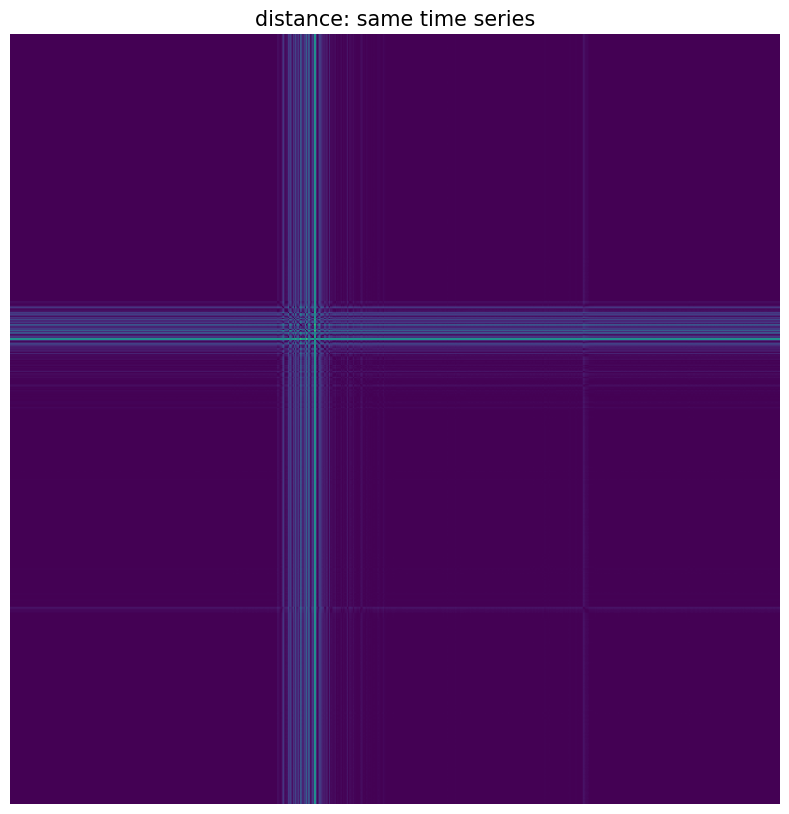

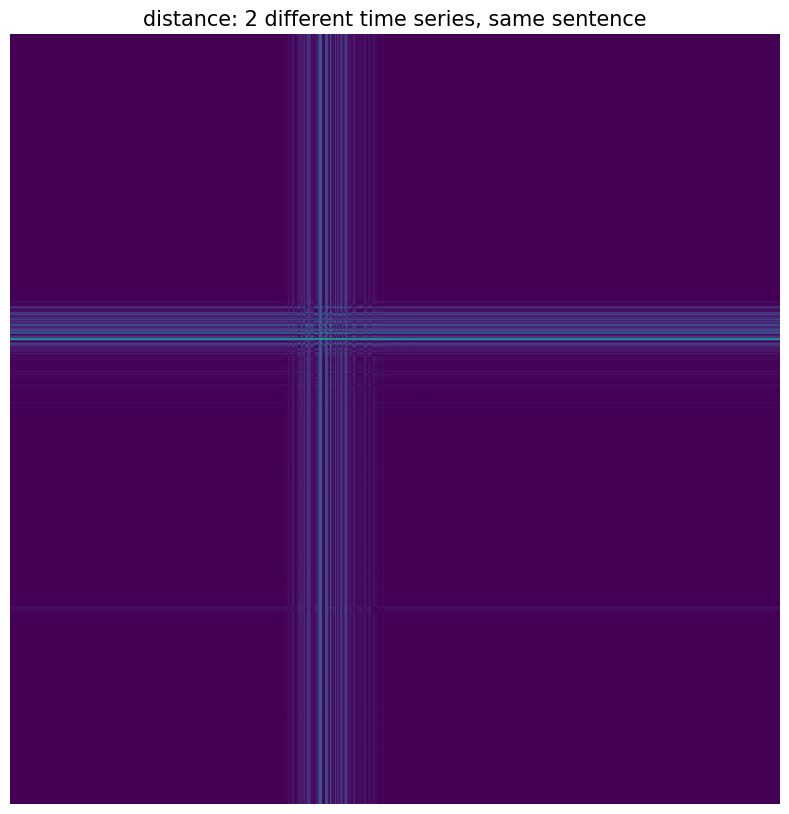

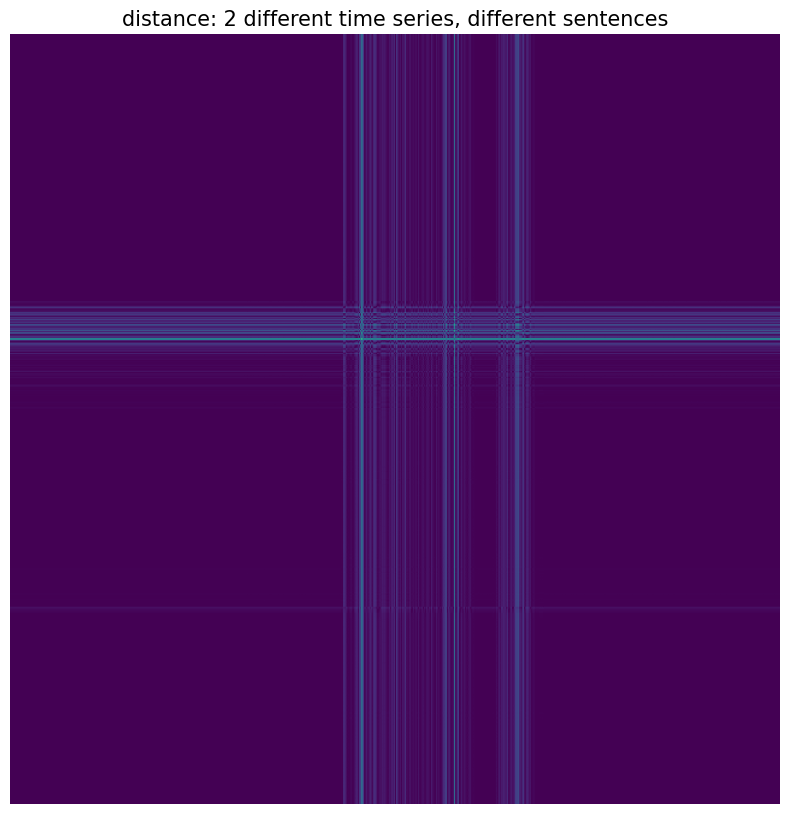

In [92]:
pl.imshow(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[1][::steps]).T,
      metric=l1))
pl.title("distance: same time series", fontsize=15)
pl.axis('off')
pl.show()

pl.figure()
pl.imshow(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[2][::steps]).T,
      metric=l1))
pl.title("distance: 2 different time series, same sentence", fontsize=15);
pl.axis('off')
pl.show()

pl.figure()
pl.imshow(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[10][::steps]).T,
      metric=l1))
pl.title("distance: 2 different time series, different sentences",
         fontsize=15);
pl.axis('off');
pl.show()


(Some plots showed themselves twice, so I will write a caption for the last three)

Figure 4: Three distance matricies between sound bites using the L1 distance metric is plotted. (3rd graph from top) The L1 distance matrix for sound bites from the same time series. A series of bright bands are seen in the colormap, while the rest of the colormap is in dark blue. These bright bands signal similarity between certain sound bites. A (hard to see) black diagonal line from top left to bottom right is also seen, as the L1 distance between elements of the same time series should be minimal. Looking at the sound bites that we do have along with their placement, these bright bands seemingly correspond to when the distance between sound bites of "turn off the lights" and "turn on the lights". Fainter, lighter blue bands are also seen in the graph, which seemingly correspond to some sound bite of "turn off the tv" and "turn off the lights" being similar. (4th graph from top) The L1 distance matrix for sound bites of 2 different time series but of the same sentence. A series of bright bands are seen in the colormap, while the rest of the colormap is in dark blue. These bright bands signal similarity between certain sound bites. Similar sound bites as outlined in the caption for the 3rd graph from the top are most likely the reason for the bright bands here as well. However, in contrast to the 3rd graph from the top, having a different time series though from the same sentence may restructure and scatter the data about, resulting in a slightly wider bright band cross behavior in this graph. (5th graph from the top) The L1 distance matrix for sound bites from two different time series for different sentences. Three bright bands are seen vertically towards the middle of the colormap. These bright bands signal similarity between certain sound bites. Similar sound bites as outlined in the caption for the 3rd graph from the top are most likely the reason for the bright bands here as well. However, in contrast to both the 3rd from the top and 4th from the top graph, different time series and different sentences can potentially give rise to different parts of the distance matrix being the same, due to different sound bites being spread out (and these sound bites, though different order, being the same kinds between the different time series and sentences).

because it is very hard to tell whatis going on in the plots above let's replot with the color in logscale

C:\Users\yucachen\AppData\Local\Temp\ipykernel_17268\175387200.py:1: RuntimeWarning: divide by zero encountered in log10
  pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T,


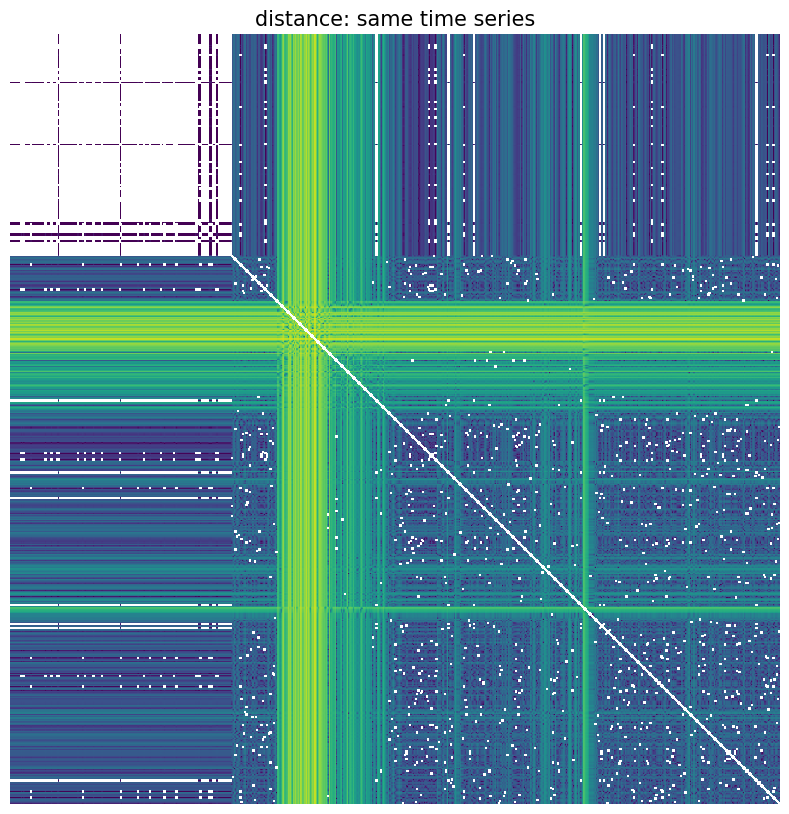

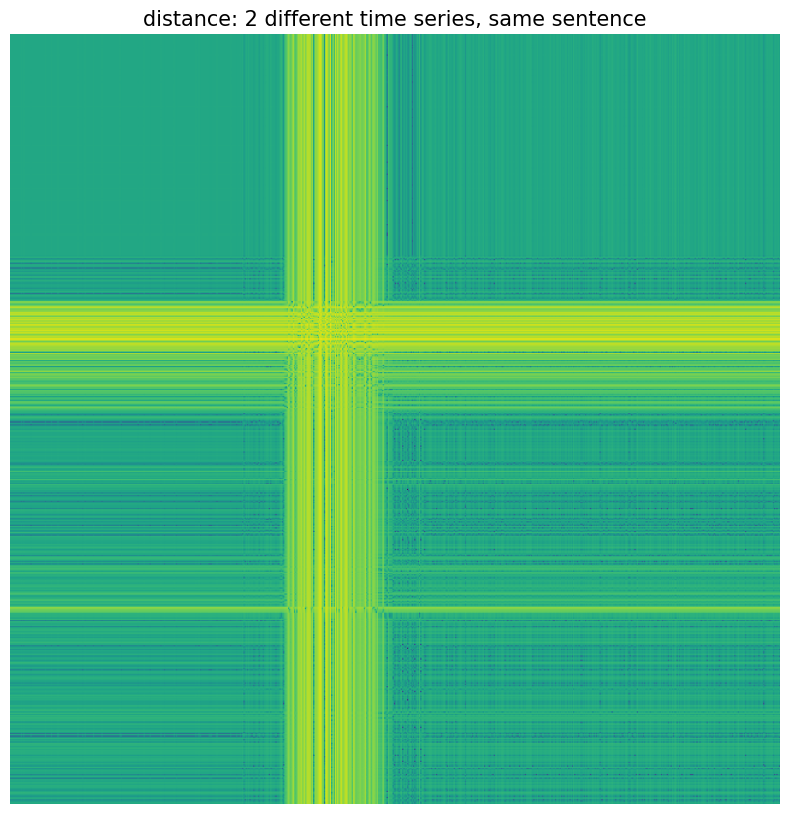

<Figure size 1500x1000 with 0 Axes>

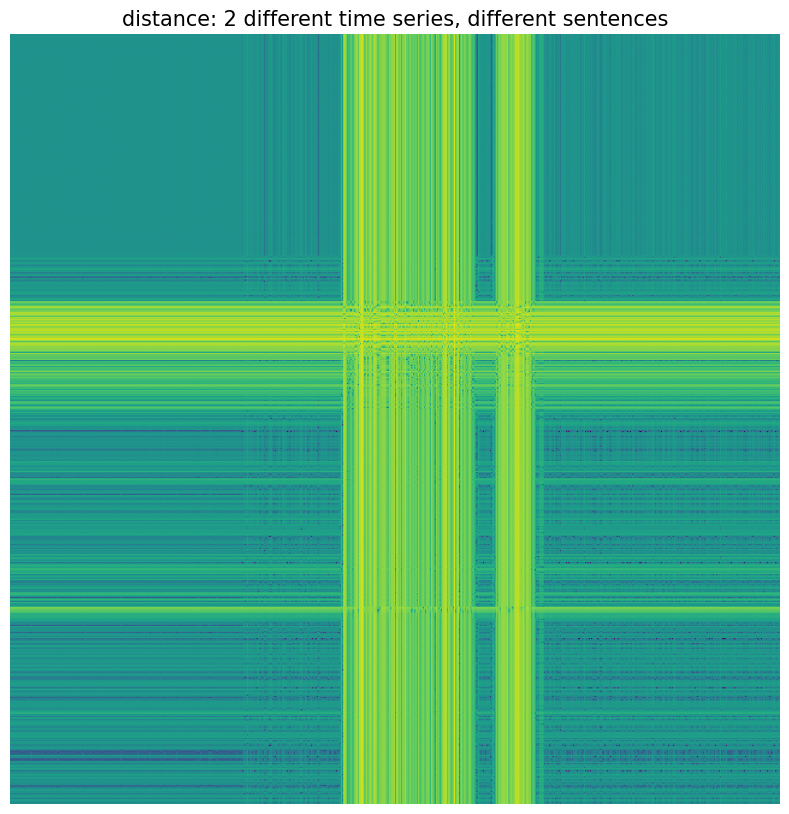

In [94]:
pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[1][::steps]).T,
      metric=l1)))
pl.title("distance: same time series", fontsize=15)
pl.axis('off')
pl.show()

pl.figure()
pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[2][::steps]).T,
      metric=l1)))
pl.title("distance: 2 different time series, same sentence", fontsize=15);
pl.axis('off')
pl.figure()
pl.show()

pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[10][::steps]).T,
      metric=l1)))
pl.title("distance: 2 different time series, different sentences",
         fontsize=15);
pl.axis('off');
pl.show()

Figure 5: Three distance matricies between sound bites using the L1 distance metric is plotted in logscale of base 10. (1st graph from top) The L1 distance matrix in logscale of base10 for sound bites from the same time series. A series of bright bands are seen in the colormap, while the rest of the colormap is in dark blue or white. Similar to Figure 4, these bright bands signal similarity between certain sound bites (i.e. similarity between "turn off the lights" and "turn on the lights", and "turn off the tv" and "turn off the lights"). In logscale, more similarities/differences can be seen between the same time series, as the bright cross band behavior is now much more pronounced and spread out. A white diagonal line from the top left to bottom right is also now seen much easier in the plot compared to Figure 4 (a the same diagonal line is also seen in Figure 4 but in black instead) -- this is expected as the distance between the same sound bite should be minimal. (2nd graph from top) The L1 distance matrix in logscale of base10 for sound bites of 2 different time series but of the same sentence. A series of bright bands are seen in the colormap, while the rest of the colormap is in dark blue. These bright bands signal similarity between certain sound bites. Similar sound bites as outlined in the caption for the 1st graph from the top and the Figure 4 caption are most likely the reason for the bright bands here as well. However, in contrast to the 1st graph from the top, having a different time series though from the same sentence may restructure and scatter the data about, resulting in a slightly wider bright band cross behavior in this graph. Having the graph in logscale also emphasizes the horizontal bright band towards the bottom of the graph better, better signaling the similarities here as well compared to not having logscale in Figure 4. (3rd graph from the top) The L1 distance matrix for sound bites  in logscale of base10 from two different time series for different sentences. Three bright bands are seen vertically towards the middle of the colormap. These bright bands signal similarity between certain sound bites. Similar sound bites as outlined in the caption for the 1st graph from the top are most likely the reason for the bright bands here as well. However, in contrast the two graphs already seen in Figure 5, different time series and different sentences can potentially give rise to different parts of the distance matrix being the same, due to different sound bites being spread out (and these sound bites, though different order, being the same kinds between the different time series and sentences). Similar to the 2nd graph from the top, having the graph in logscale also emphasizes the horizontal bright band towards the bottom of the graph better along with having the color between the vertical bands be brighter as well, better signaling the similarities compared to not having logscale in Figure 4. 


## Computing the distance between all pixel pairs is also prohibitively slow. Do doit I further resampled the array by another factor of 10

C:\Users\yucachen\AppData\Local\Temp\ipykernel_17268\2301649689.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.imshow(np.log10(cdist(np.atleast_2d(X[i][::restep]).T,


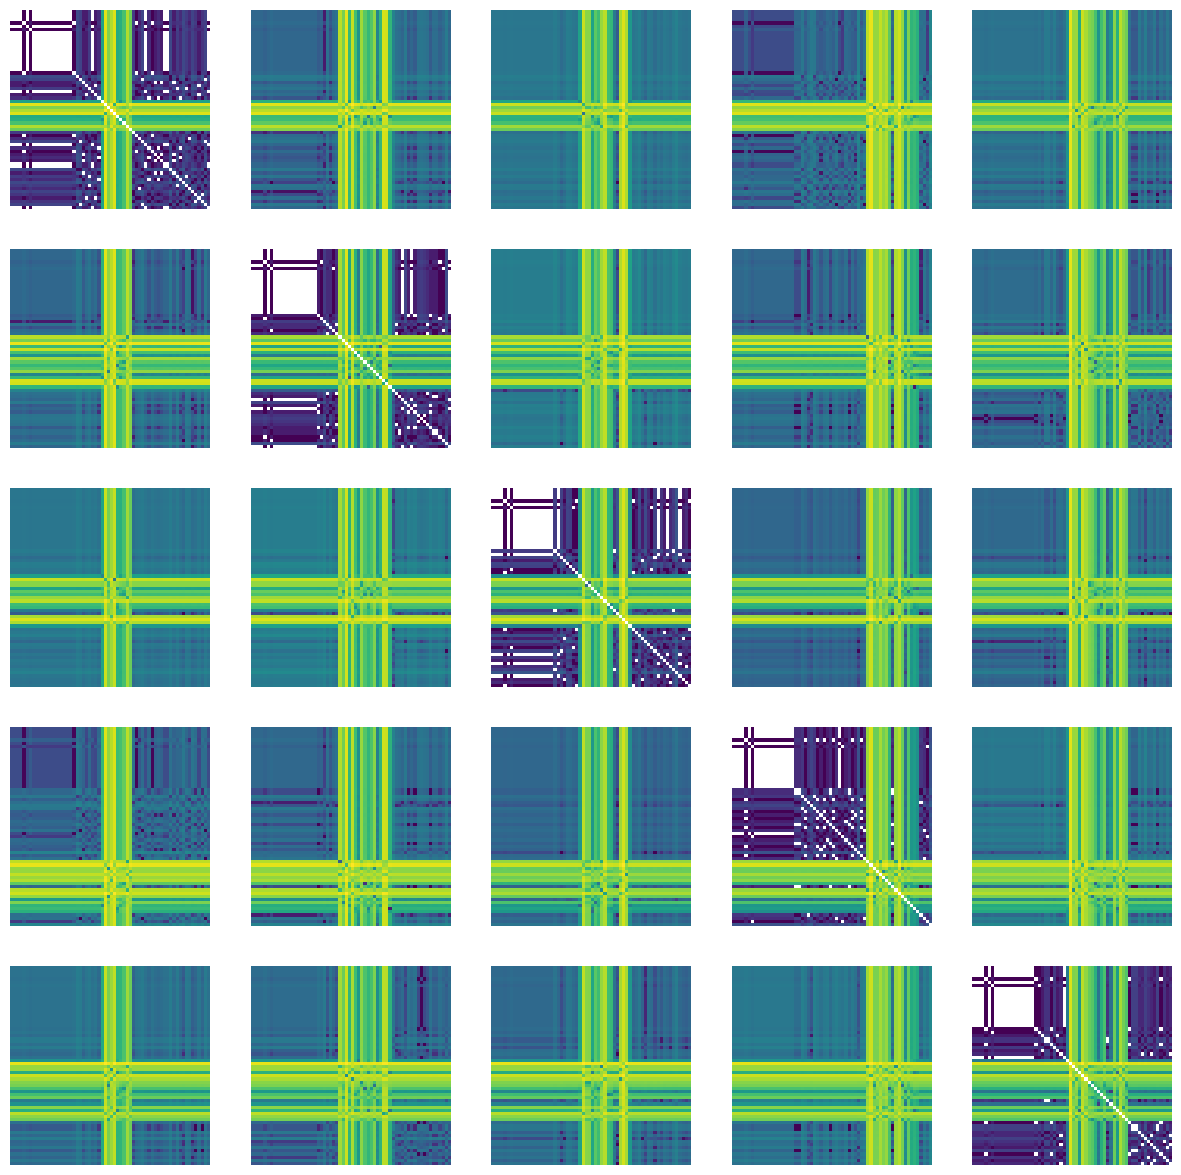

In [96]:
restep = 100
fig = pl.figure(figsize(15, 15))

for i in range(0,25,5):
    for k, j in enumerate(range(0,25,5)):
        ax = fig.add_subplot(5,5,i + k + 1)
        pl.imshow(np.log10(cdist(np.atleast_2d(X[i][::restep]).T,
                np.atleast_2d(X[j][::restep]).T,
          metric=(lambda x,y: np.abs(x - y)))))
        pl.axis('off');

pl.show()

Figure 6: Same as figure 5 for all pairs of sound bites. The plots on the diagional show the L1 distance matrix in logscale of base 10 betweeen the same pair of sound bites -- the diagonal matricies are (expectedly) identical. Similarities between different sound bites are seen during different parts of the indivudal matricies as well. The difference in similarities helps to highlight how the different/similar the sound bite sentences are. Most likely, the bright cross lines denote similarities beteween certain parts of the sound bites, similar to Figures 4 and 5 (i.e. similarity between "turn off the lights" and "turn on the lights", and "turn off the tv" and "turn off the lights")

# DTW distance
The DTW algorithm calculates the distance as the sum along a path in the  pair-wise distance matrix that minimized the distance between points, at the cost of increasing the length of the path. The simple Euclidean distance between 2 matrices would be the sum along the diagonal. In DTW this sum is modified to be the sum over the elements as follows:


$DTW(Q_i, C_j) = d(Q_i, C_j) + min(d(Q_{i-1}, C_{j-1}), d(Q_{i-1}, C_j), d(Q_i, C_{j-1})) $
Where $d$ is the distance between 2 time stamps: e.g. the absolute value of thedifference (L1)

The algorithm has the following rules:

- Every index from the first sequence must be matched with one or more indices from the other sequence and vice versa
- The first index from the first sequence must be matched with the first index from the other sequence (but it does not have to be its only match)
- The last index from the first sequence must be matched with the last index from the other sequence (but it does not have to be its only match)
- The mapping of the indices from the first sequence to indices from the other sequence must be monotonically increasing, and vice versa, i.e. if j > i are indices from the first sequence, then there must not be two indices l > k in the other sequence, such that index i is matched with index l and index j is matched with index k , and vice versa

Remember that you will need to start with the L1 distance: at every step you will need to know the L1 distance for several surrounding cells. While you could calculate it on the spot it is more computationally efficient in python to calculate it for the whole array at once, as long as you can store the whole array in memory. Solving this with "dynamic coding", you can calculate all pair-wise distances first, storing the distance matrix, then find the path along the matrix and calculating the DTW distance by looking up values of the relevant cells. Pairwise L1 distance can be caluclated for the entire matrix with ```scipy.spatial.distance.cdist```

With that in mind, create a function that given x and y, two np.arrays of n and m elements respectively, returns
 - the DTW distance
 - the DTW distance matrix
 - the path along the matrix as x-y indices (look in the slides if you need help with this one: I added the code in there)

Make sure your function called *dtw()* and make sure that it has a "docstring' that complies to PEP conventions https://www.python.org/dev/peps/pep-0257/



Run your function for the soundbite arrays using every 100th datapoint and plot the array and the path along the array
 - for the first normalized sound array matched with itself
 - for the first normalized sound array matched with another normalized sound array of the same phrase:  soundbites are the same sentence 5 by 5: 0-4 same sentence, 5-9, 10-14, 15-19, 19-20
 - for the first unnormalized sound array matched with another unnormalized sound array, the same one as in the previous step
 - any two other normalized arrays, not the same sentence.

What is the path for the first array you plotted? Why?

## *task 3: write on your own the DTW algorithm. Use the rules above and the pseudocode and equations in the slides*

## *Extra Credit: code the DTW with a parameter r tha allows to search farther than one step away from the diagonal. Make that r an input to your dtw() function*

In [101]:
def path(DTWm):
  # the path can be calculated backword or forward
  # I find bacward more intuitive

  # start at one to the last cell:
  i, j = np.array(DTWm.shape) - 2

  #since I do not know how long the path is i will use lists
  # p and q will be the list of indices of the path element along the 2 array axes
  p, q = [i], [j]
  # go all the way to cell 0,0
  while (i > 0) or (j > 0):
      	# pick minimum of 3 surrounding elements:
      	# the diagonal and the 2 surrounding it
        tb = argmin((DTWm[i, j], DTWm[i, j+1], DTWm[i+1, j]))
        #stay on the diagonal
        if tb == 0:
            i -= 1
            j -= 1
        #off diagonal choices: move only up or sideways
        elif tb == 1:
            i -= 1
        else:  # (tb == 2):
            j -= 1
        # put i and the j indexx into p and q pushing existing entries forward
        p.insert(0, i)
        q.insert(0, j)
  return array(p), array(q)



## code steps:
- Calculate the distance matrix according to L1
- Set the 0,0 cell to 0
- for all values of the index i; for all values of the index j

  set the DTW[i,j] cell to $L1 + min(l1(Q_{i-1}, C_{j-1}), L1(Q_{i-1}, C_j), L1(Q_i, C_{j-1}))$

- calculate the DTW path
- return the value of the last cell (DTW[-1,-1])  the DTW array, the path

note: you will likely have to have a nested loop but there are extra points if yuo can figure out how to write it without a nested loop (for i...: for j....:)

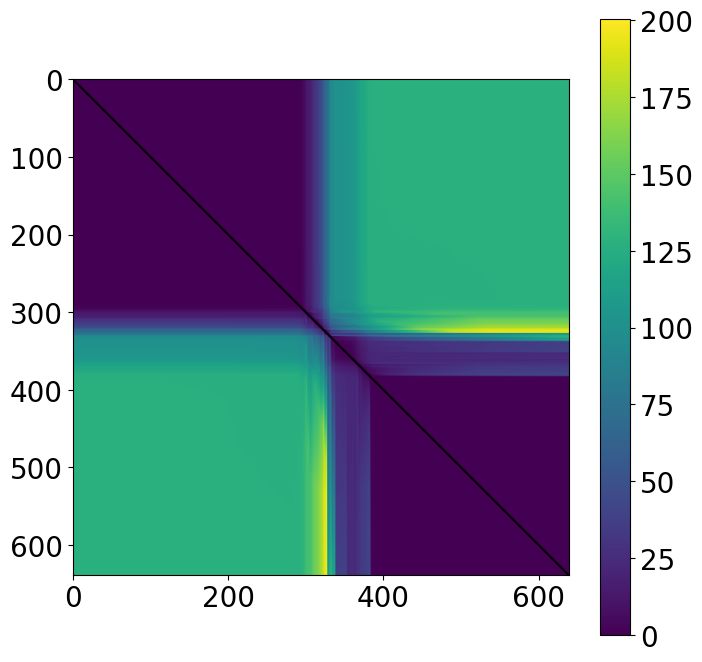

dtw distance:  0.0


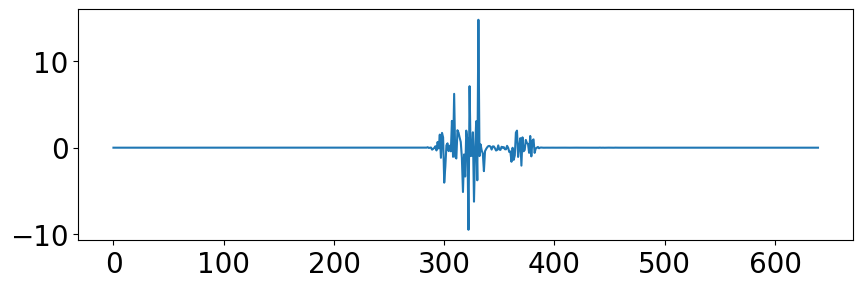

In [122]:
# shown in slack, current code block 

restep = 10

def dtw(x, y, show=False, getpath=True, r=1):
    """
    Returns a DTW matrix along with (optionally) returning a path through the matrix using the "path" function
    Inputs: 
     - x (array or list): x values of elements n
     - y (array or list): y values of elements m, corresponding to x values
     - show (boolean): show or not show colormap of final DTW computed array
     - getpath (boolean): obtain values of the path calculated along the matrix

    Outputs (if getpath == True): 
     - A list of (final DTW array matrix [numpy array], final DTW matrix [numpy array], values of the path indices in (p, q) [floats])

    Outputs (if getpath == False):
     - final DTW array matrix [numpy array]
    """
    
    x = np.array(x)
    y = np.array(y)

    D = cdist(x[:, None], y[:, None], metric='cityblock')

    N, M = D.shape
    DTW = np.full((N, M), np.inf)
    #DTW[0, 0] = 0
    DTW[0, 0] = D[0, 0]
    p, q = None, None

    # skip element [0, 0] since we already set the value
    for i in range(1, N):
        for j in range(1, M):
            DTW[i, j] = D[i, j] + np.min((
                DTW[i - 1, j],
                DTW[i, j - 1],
                DTW[i - 1, j - 1]
            ))
            
    p, q = path(DTW)

    # if getpath:
        # p, q = path(DTW_final)
        # p, q = path(DTW)

    DTW_final = DTW[1:, 1:]

    if show:
        plt.figure(figsize=(8, 8))
        plt.imshow(DTW_final)
        plt.colorbar()
        if p is not None and q is not None:
            plt.plot(q, p, color='black')
        plt.show()

    if getpath:
        return DTW_final[-1, -1], DTW_final, (p, q)
    return DTW[-1, -1]


# DTW distance to itslef
print("dtw distance: ", dtw(X[0][::restep], X[0][::restep], show=True)[0]);
pl.figure(figsize(10,3))
pl.plot(X[0][::restep]);
pl.show()

Figure 7: (Top graph) The distance matrix using the DTW algorithm is shown for the same sound bite for every 10th data point, along with the computed path through the final computed DTW array. The data is normalized before being fed into the DTW algorithm. The path, in the solid black, is seen to be straight diagonal from top left to bottom right, which is to be expected for comparing the DTW distance between the same sound bite. The dtw distance being zero (printed) also corresponds to this straight diagonal line. A variety of distances are seen in the computed DTW matrix, though it is noted that the distance in the top left and bottom right quadrants are close to zero. A bright yellow line of distance in the colormap is seen around the 300 values in both the x and y axis. Larger distances that are similar to each other are seen in the top right and bottom left quadrants. A small gradient in color between the quandrants are seen from the differences in color. (Bottom graph) The two normalized sound bites being compared to each other are plotted in the same graph, plotted for every 10th data point. Since the sound bites are identical, the sound bites overlap each other. 

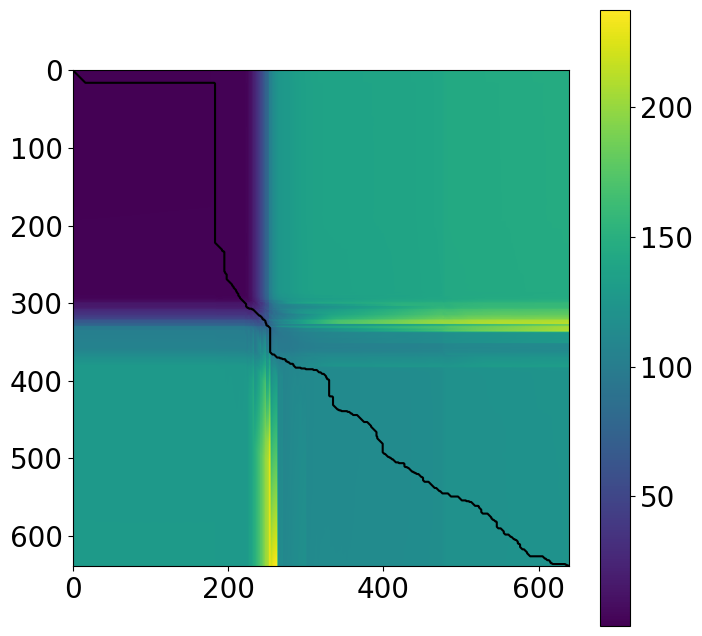

dtw distance:  121.55413980041301


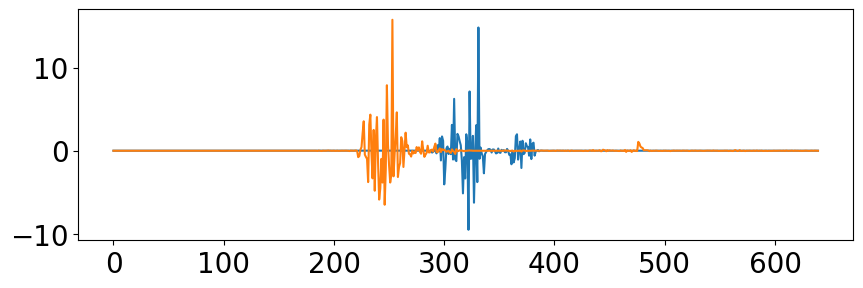

In [125]:
# DTW distance to a file with a different sound bite, normalized
print("dtw distance: ", dtw(X[0][::restep], X[1][::restep], show=True)[0])
pl.figure(figsize(10,3))
pl.plot(X[0][::restep])
pl.plot(X[1][::restep]);
pl.show()

Figure 8: (Top graph) The distance matrix using the DTW algorithm is shown for two different normalized sound bites for every 10th data point, along with the computed path through the final computed DTW array. The path, in the solid black, is seen to no longer be straight diagonal from the top left to bottom right. It instead varies going up, down, or diagonal. This corresponds to the printed dtw distance value of ~122. However, it does still make its way from the top left corner to bottom right corner. A variety of distances are seen in the computed DTW matrix, though it is noted that the distance in the top left is close to zero. A bright yellow line of distance in the colormap is seen below 300 values (around ~270) in both the x and y axis. Larger distances that are similar to each other are seen in the top right and bottom left quadrants. The bottom right quadrant is now no longer closer to zero, and instead is closer to ~100 distance instead. A small gradient in color between the quandrants are seen from the differences in color. (Bottom graph) The two normalized sound bites being compared to each other are plotted in the same graph, plotted for every 10th data point. 

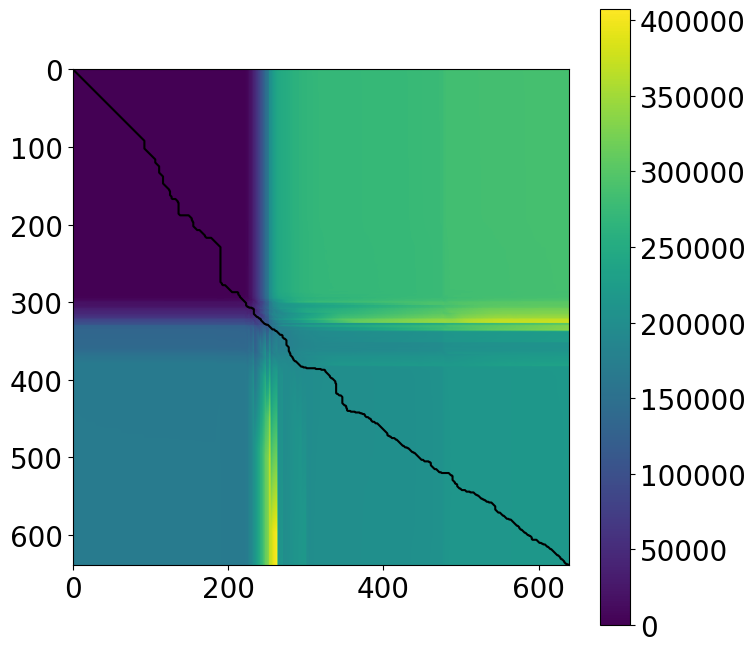

dtw distance:  216485.0


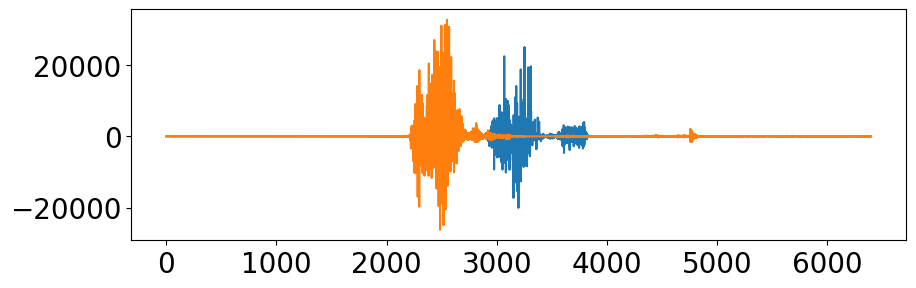

In [127]:
# DTW distance to a file with a different sound bite, normalized
print("dtw distance: ", dtw(wavfiles[0][::steps*restep], wavfiles[1][::steps*restep], show=True)[0])
pl.figure(figsize(10,3))
pl.plot(wavfiles[0][::restep])
pl.plot(wavfiles[1][::restep]);
pl.show()

Figure 9: (Top graph) The distance matrix using the DTW algorithm is shown for two different unnormalized sound bites for every 10th data point, along with the computed path through the final computed DTW array. Interestingly, a difference is seen in the computed path with unnormalized data versus normalized data in Figure 8. The path, in the solid black, is not straight diagonal from the top left to bottom right. It instead varies going up, down, or diagonal. This corresponds to the printed dtw distance value of ~216485. However, it does still make its way from the top left corner to bottom right corner. Differences in the path compared to Figure 8 are seen, especially when the path is in the top left quadrant (Figure 8's path goes straight to the right and then down, while Figure 9's path takes a slightly more diagonal path down). A variety of distances are seen in the computed DTW matrix, though it is noted that the distance in the top left is close to zero. A bright yellow line of distance in the colormap is seen around ~250 in both the x and y axis, lower than both Figure 7 and Figure 8. The rest of the three quadrants are also distinct from each other in comparison to either Figure 7 or Figure 8, with the top right quadrant having the highest relative distance compared to the bottom left and bottom right quadrant. Note that the scale is much larger in this figure in comparison to Figure 8 due to the unnormalized data used. (Bottom graph) The two unnormalized sound bites being compared to each other are plotted in the same graph, plotted for every 10th data point. 

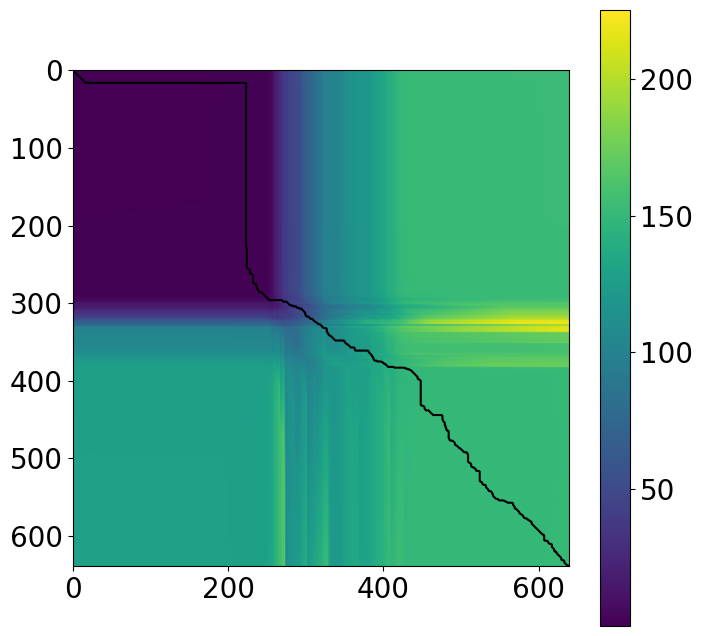

dtw distance:  150.50888976161608


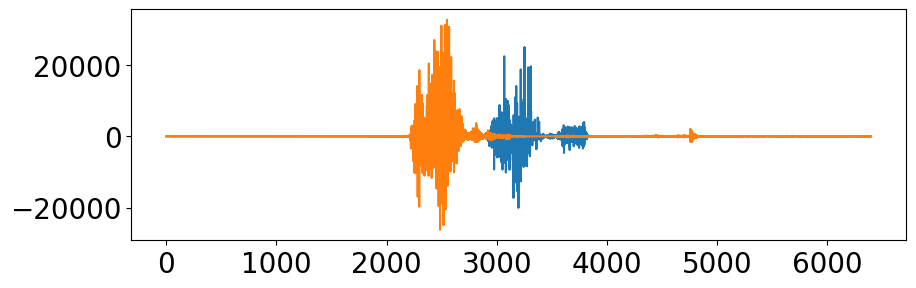

In [129]:
# DTW distance to a file with a different sound bite
print("dtw distance: ", dtw(X[0][::restep], X[24][::restep], show=True)[0])
pl.figure(figsize(10,3))
pl.plot(wavfiles[0][::restep])
pl.plot(wavfiles[1][::restep]);
pl.show()

Figure 10: (Top graph) The distance matrix using the DTW algorithm is shown for two different unnormalized sound bites for every 10th data point, along with the computed path through the final computed DTW array. The two unnormalized sound bites here are different than the two compared in Figure 9. The path, in the solid black, is not straight diagonal from the top left to bottom right. It instead varies going up, down, or diagonal. This corresponds to the printed dtw distance value of ~151. However, it does still make its way from the top left corner to bottom right corner. This difference in DTW distance compared to Figure 9 implies that these two unnormalized sound bites are more similar to each other compared to the two unnormalized sound bites compared in Figure 9. A variety of distances are seen in the computed DTW matrix, though it is noted that the distance in the top left is close to zero. A bright yellow line of distance in the colormap is seen around ~270 in the y axis only, in contrast to the other figures analyzed in Task 3. An extended "cross" feature is seen in this DTW matrix compared to the other ones computed in Task 3, signaling more variation in the time series that may/may not be similar to each other at different points in time. The top left quadrant generally has a distance near zero. The rest of the three quadrants are non-zero and distinct from each other, with the top right quadrant having the highest relative distance compared to the bottom left and bottom right quadrant. However, in contrast to Figure 9's matrix, the bottom right quadrant is more similar in color to the top right quadrant (where in Figure 9, the bottom right quadrant was more similar in color to the bottom left's quadrant color). Note that though unnormalized data is used here, the scale of the colormap is generally 3 orders of magnitude lower than the scale in Figure 9. (Bottom graph) The two unnormalized sound bites being compared to each other are plotted in the same graph, plotted for every 10th data point. 


# 2 What is the nearest neighbor of the first sound bite?

In [133]:
# what is most similar to the first time series? (other than itself)
distances = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distances[i], _, _ = dtw(X[0][::restep], X[i][::restep]);


0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [134]:
distances.argsort()

array([ 0,  3,  2,  1, 24, 13,  4,  5,  8, 22, 19, 15,  6, 16, 11, 12, 18,
        7,  9, 17, 10, 14, 23, 20, 21], dtype=int64)

In [135]:
print("Based on its nearest neighbor the first sound bite says...")
print(y[distances.argsort()[1]])

Based on its nearest neighbor the first sound bite says...
Jarvis


## *task 4: Classify the 20th sound bite based on its nearest neighor with Euclidean and DTW distance*

In [137]:
# what is most similar to the first time series? (other than itself)
distancesE = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distancesE[i] = euclidean(X[19], X[i]);



0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [138]:
distancesE.argsort()

array([19,  0, 11, 18,  8, 12,  6, 16,  2, 14, 22,  3, 17, 21,  1,  4, 13,
        9, 10, 15,  5, 23, 24, 20,  7], dtype=int64)

In [139]:
print("Based on its nearest neighbor and Euclidian distance ",
      "the last sound bite says...")
print(y[distancesE.argsort()[1]])
print("Correct!") if y[distancesE.argsort()[1]] == y[19] else print("Sorry...")

Based on its nearest neighbor and Euclidian distance  the last sound bite says...
Jarvis
Sorry...


In [140]:
# what is most similar to the first time series? (other than itself)
distancesDTW = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distancesDTW[i] = dtw(X[19][::steps], X[i][::steps], getpath=False);

0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [141]:
print("Based on its nearest neighbor and DTW distance ",
      "the last sound bite says...")
print(y[distancesDTW.argsort()[1]])
print("Correct!") if y[distancesDTW.argsort()[1]] == y[19] else print("Sorry...")

Based on its nearest neighbor and DTW distance  the last sound bite says...
Tofftl
Sorry...
